<a href="https://colab.research.google.com/github/neenu-wq/CODSOFT/blob/main/CodSoft1_Credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

**LOADING DATASET**

In [ ]:
df=pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

**DATA PREPROCESSING**

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**FILLING MISSING DATA**


In [ ]:
df['V23']=df['V23'].fillna(df['V23'].mean())
df['V24']=df['V24'].fillna(df['V24'].mean())
df['V25']=df['V25'].fillna(df['V25'].mean())
df['V26']=df['V26'].fillna(df['V26'].mean())
df['V27']=df['V27'].fillna(df['V27'].mean())
df['V28']=df['V28'].fillna(df['V28'].mean())
df['Amount']=df['Amount'].fillna(df['Amount'].mean())
df['Class']=df['Class'].fillna(df['Class'].mode()[0])

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

**DATA VISUALIZATION**

<Axes: >

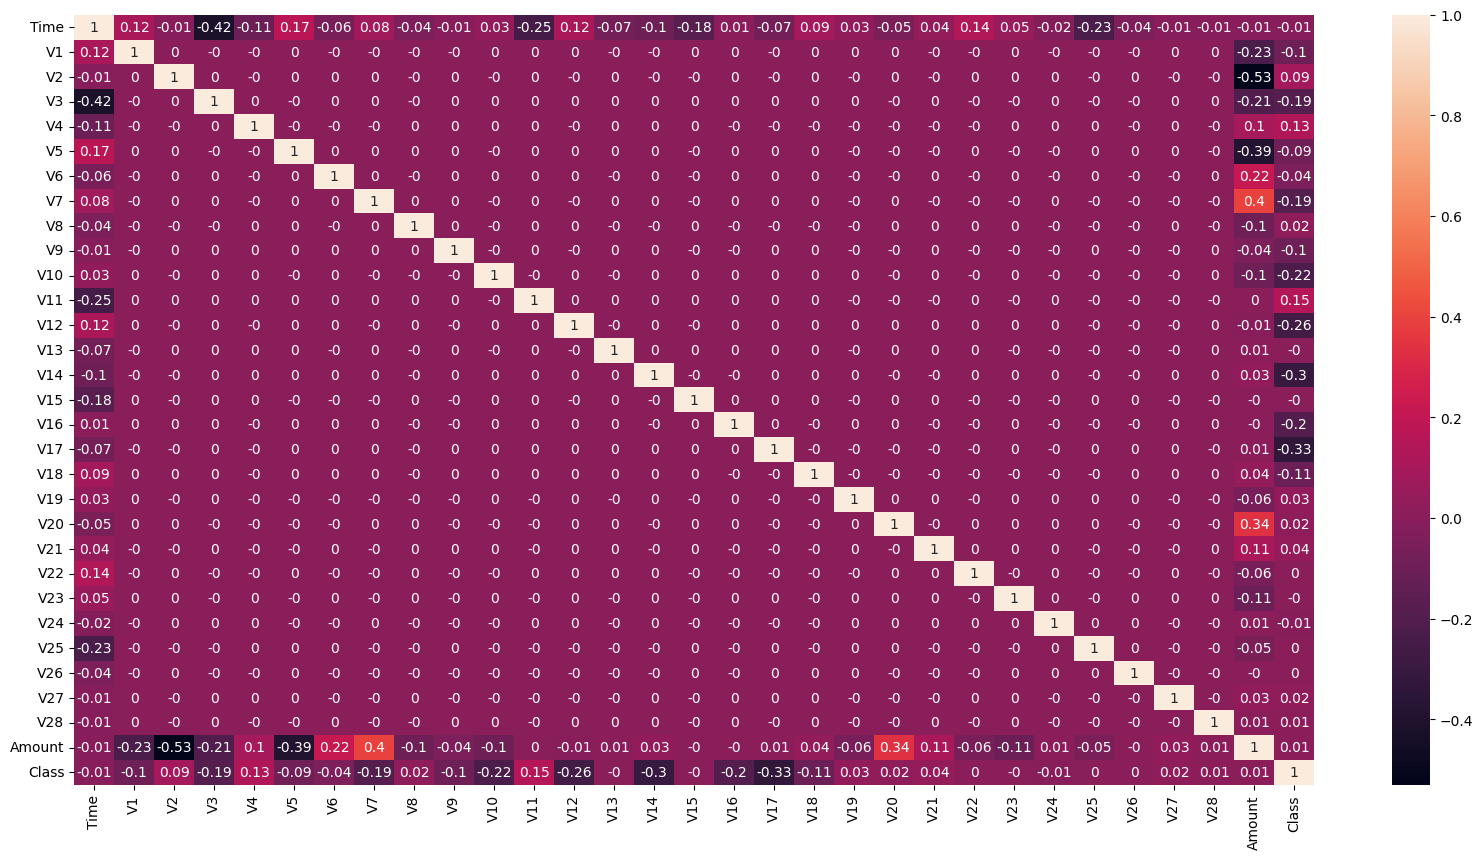

In [ ]:
plt.figure(figsize=(20,10))
cor=df.corr(method='pearson',min_periods=1,numeric_only=True).round(2)
sns.heatmap(cor,annot=True)

**DROPPING LESS CORRELATED COLUMNS**

In [ ]:
df.drop(['Time','V13','V15','V22','V23','V25','V26'],axis=1,inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V24,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.991691,0.510632,-0.682920,1.475829,0.213454,-0.509348,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-0.025693,-1.221179,-1.545556,0.059616,0.214205,-1.016226,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.313502,0.395652,-0.577252,0.001396,0.232045,0.640134,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.509928,1.113981,2.897849,0.127434,0.265245,0.123205,0.108821,0.104533,10.00,0


**DETERMINING OUTLIERS**

<Axes: >

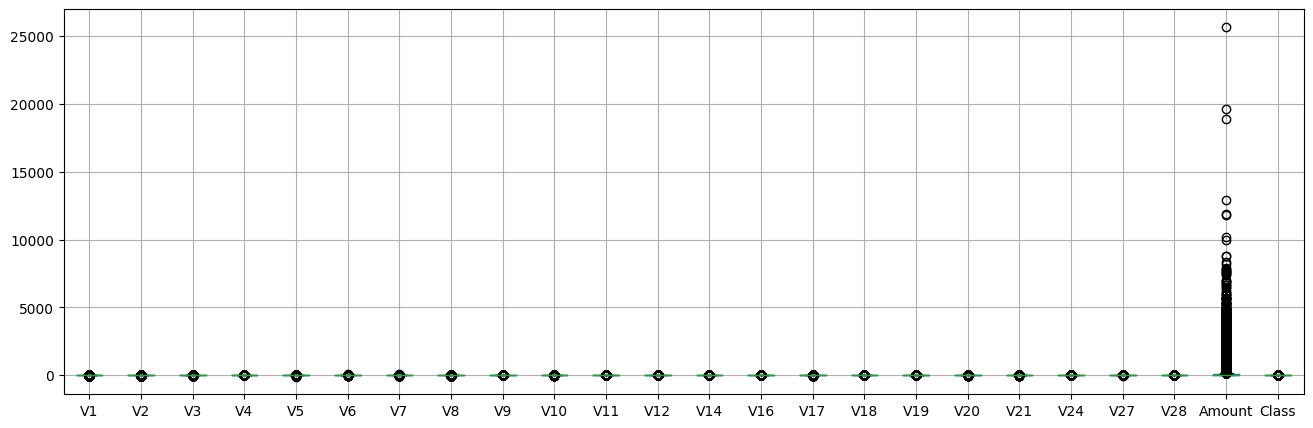

In [ ]:
plt.figure(figsize=(16,5))
df.boxplot()

**REMOVING OUTLIERS**

In [ ]:
numerical_columns = df.select_dtypes(include=['float64']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)
df1= df[~outliers]
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df1.shape)

Original dataset shape: (284807, 24)
Cleaned dataset shape: (152869, 24)


<Axes: >

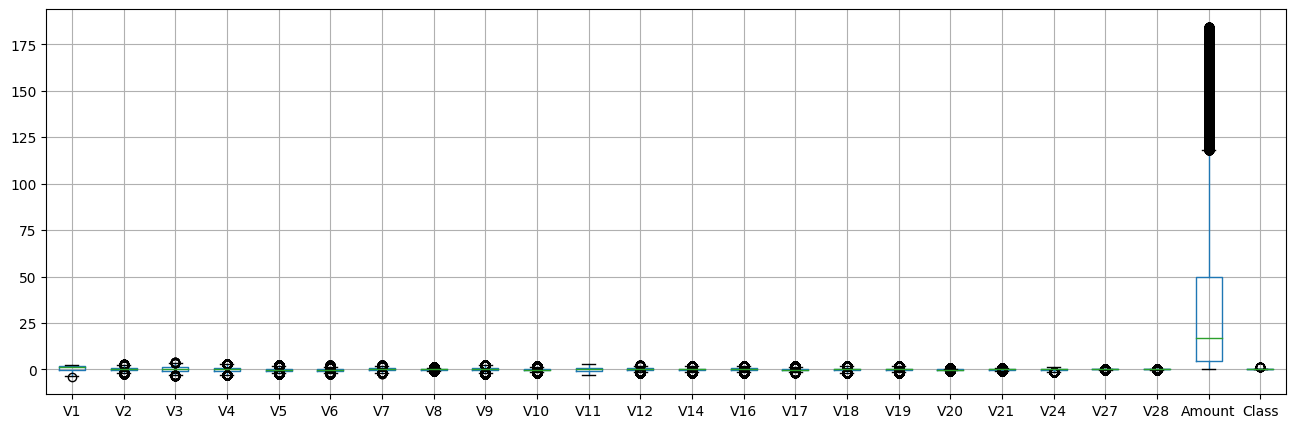

In [ ]:
plt.figure(figsize=(16,5))
df1.boxplot()

**CONVERTING IMBALANCED DATA INTO A BALANCED DATA**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
random=RandomOverSampler(sampling_strategy='minority')
x_ran=df1.drop('Class',axis=1)
y_ran=df1['Class']
X,Y=random.fit_resample(x_ran,y_ran)
print("The distribution of Class before oversampling",y_ran.value_counts())
print("The distribution of Class after oversampling",Y.value_counts())

The distribution of Class before oversampling Class
0    152852
1        17
Name: count, dtype: int64
The distribution of Class after oversampling Class
0    152852
1    152852
Name: count, dtype: int64


In [ ]:
dfe=pd.DataFrame(Y)
dfe

,Class
0,0
1,0
2,0
3,0
4,0
...,...
305699,1
305700,1
305701,1
305702,1


In [ ]:
df2=pd.concat([X,dfe],axis=1)
df2

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V17,V18,V19,V20,V21,V24,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69,0
2,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50,0
3,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99,0
4,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.371427,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305699,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,-0.550545,...,0.874891,0.941477,0.272698,-0.042515,0.070633,-0.438908,-0.072852,0.010463,1.00,1
305700,0.290155,0.049243,-0.740524,2.865463,1.395294,-0.535163,0.142543,-0.222770,-1.463691,1.713538,...,0.472995,-0.447899,1.790924,0.247580,0.337349,0.833886,-0.220402,0.168233,7.18,1
305701,0.114965,0.766762,-0.494132,0.116772,0.868169,-0.477982,0.438496,0.063073,-0.186207,-0.159325,...,0.653662,0.334655,1.028927,0.062199,-0.284413,0.600742,0.099145,0.010810,4.49,1
305702,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,-0.432111,-0.585778,...,1.143130,0.256014,-0.511210,-0.102772,-0.062166,0.110040,-0.018287,0.031173,0.76,1


**SPLITTING INTO INPUT AND OUTPUT**

In [ ]:
x_new=df2.drop('Class',axis=1).values
y_new=df2['Class'].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.30,random_state=42)
x_train

array([[ 1.17671576e+00,  5.57090903e-01, -4.90799623e-01, ...,
        -1.82873481e-02,  3.11734033e-02,  7.60000000e-01],
       [-4.30330206e-01,  9.85632694e-01,  6.45789437e-01, ...,
        -3.94559688e-02, -6.35758223e-03,  3.01400000e+01],
       [ 1.22140021e+00,  1.56468144e-01,  2.02093898e-01, ...,
         3.77240419e-02,  8.37154409e-03,  1.84600000e+01],
       ...,
       [ 2.07494179e+00, -1.61506035e+00, -1.74661943e+00, ...,
        -6.15452119e-02, -2.77524746e-02,  1.59000000e+02],
       [-1.49299973e-01,  1.01005178e+00, -1.49320006e+00, ...,
        -1.82285817e-01,  2.28577385e-02,  2.10000000e+01],
       [-6.16839971e-01,  6.81313662e-01,  1.69562640e+00, ...,
         3.33368524e-01,  1.98088084e-01,  2.99900000e+01]])

In [ ]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
x_test

array([[ 1.24384845e+00,  5.24525773e-01, -5.38883626e-01, ...,
         4.59171450e-02,  4.01359981e-02,  1.00000000e+00],
       [ 1.31415561e+00,  1.40831806e-01, -9.69669299e-02, ...,
        -4.13983714e-02,  1.63817763e-02,  1.29000000e+00],
       [ 1.40802970e+00, -1.31636479e+00, -1.90234429e-01, ...,
        -8.85356424e-03,  6.30269019e-03,  8.56800000e+01],
       ...,
       [ 5.10754846e-02,  1.31042652e+00,  7.33222065e-01, ...,
        -2.97595395e-01, -2.21816034e-01,  2.47000000e+00],
       [-4.81531151e-01,  1.05954228e+00,  6.47117403e-01, ...,
        -7.28522477e-02,  1.04633126e-02,  1.00000000e+00],
       [ 1.13741537e+00,  9.25236831e-02,  3.58031467e-01, ...,
        -6.64640686e-02,  1.44238247e-02,  4.39500000e+01]])

**NORMALIZATION**

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**MODEL CREATION**

**1.LOGISTIC REGRESSION**

In [ ]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=LR.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

Score is 0.9242083914863922
Confusion Matrix is [[38824  6951]
 [    0 45937]]
Classification report is               precision    recall  f1-score   support

           0       1.00      0.85      0.92     45775
           1       0.87      1.00      0.93     45937

    accuracy                           0.92     91712
   macro avg       0.93      0.92      0.92     91712
weighted avg       0.93      0.92      0.92     91712



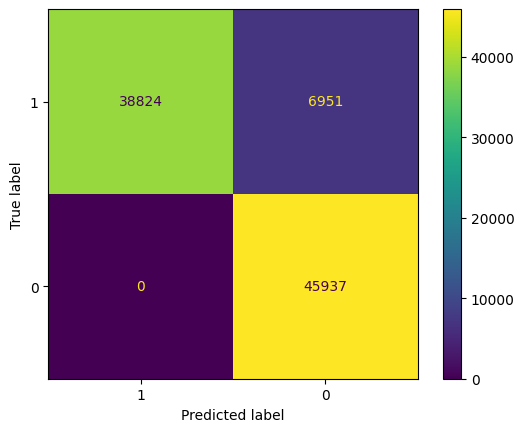

In [ ]:
print("Score is",accuracy_score(y_test,y_pred))
print("Confusion Matrix is",confusion_matrix(y_test,y_pred))
print("Classification report is",classification_report(y_test,y_pred))
labels=['1','0']
cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=labels)
cmd.plot()

**2.RANDOM FOREST**

In [ ]:
random=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
random.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
y_pred1=random.predict(x_test)
y_pred1

array([0, 0, 0, ..., 1, 1, 0])

Score is 0.794846912072575
Confusion Matrix is [[45775     0]
 [18815 27122]]
Classification report is               precision    recall  f1-score   support

           0       0.71      1.00      0.83     45775
           1       1.00      0.59      0.74     45937

    accuracy                           0.79     91712
   macro avg       0.85      0.80      0.79     91712
weighted avg       0.85      0.79      0.79     91712



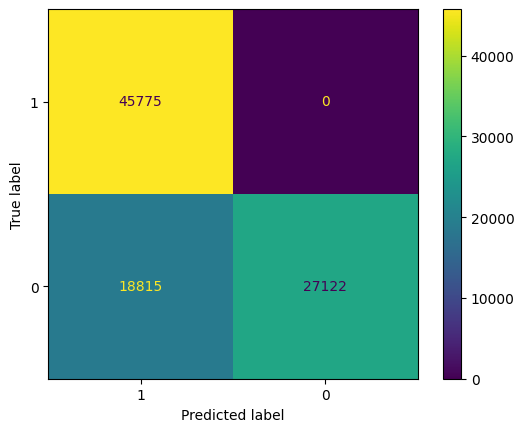

In [ ]:
print("Score is",accuracy_score(y_test,y_pred1))
print("Confusion Matrix is",confusion_matrix(y_test,y_pred1))
print("Classification report is",classification_report(y_test,y_pred1))
label=['1','0']
cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred1),display_labels=label)
cmd.plot()